In [1]:
from pprint import pprint

In [2]:
from datasets import load_dataset

raw_datasets = load_dataset("squad")

Found cached dataset squad (C:/Users/Gyanprakash/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [4]:
print("Context: ", raw_datasets["train"][0]["context"])
print("Question: ", raw_datasets["train"][0]["question"])
print("Answer: ", raw_datasets["train"][0]["answers"])

Context:  Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
Question:  To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Answer:  {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}


In [5]:
# Checking whether the dataset contains the lenght of question & answers of 1 or Not.
raw_datasets["train"].filter(lambda x: len(x["answers"]["text"]) != 1)

Loading cached processed dataset at C:\Users\Gyanprakash\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453\cache-e10a04ebd1694365.arrow


Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 0
})

In [6]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [7]:
print("Context: ", raw_datasets["train"][0]["context"])
print("Question: ", raw_datasets["train"][0]["question"])
print("Answer: ", raw_datasets["train"][0]["answers"])

Context:  Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
Question:  To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Answer:  {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}


In [8]:
pprint(raw_datasets["validation"][2]["context"])
pprint(raw_datasets["validation"][2]["question"])
pprint(raw_datasets["validation"][2]["answers"])

('Super Bowl 50 was an American football game to determine the champion of the '
 'National Football League (NFL) for the 2015 season. The American Football '
 'Conference (AFC) champion Denver Broncos defeated the National Football '
 'Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super '
 "Bowl title. The game was played on February 7, 2016, at Levi's Stadium in "
 'the San Francisco Bay Area at Santa Clara, California. As this was the 50th '
 'Super Bowl, the league emphasized the "golden anniversary" with various '
 'gold-themed initiatives, as well as temporarily suspending the tradition of '
 'naming each Super Bowl game with Roman numerals (under which the game would '
 'have been known as "Super Bowl L"), so that the logo could prominently '
 'feature the Arabic numerals 50.')
'Where did Super Bowl 50 take place?'
{'answer_start': [403, 355, 355],
 'text': ['Santa Clara, California',
          "Levi's Stadium",
          "Levi's Stadium in the San Franci

In [9]:
pprint(raw_datasets["validation"][0]["answers"])
pprint(raw_datasets["validation"][2]["answers"])

{'answer_start': [177, 177, 177],
 'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']}
{'answer_start': [403, 355, 355],
 'text': ['Santa Clara, California',
          "Levi's Stadium",
          "Levi's Stadium in the San Francisco Bay Area at Santa Clara, "
          'California.']}


## Processing the training data


In [10]:
from transformers import AutoTokenizer

model_checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [11]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [12]:
tokenizer.is_fast

True

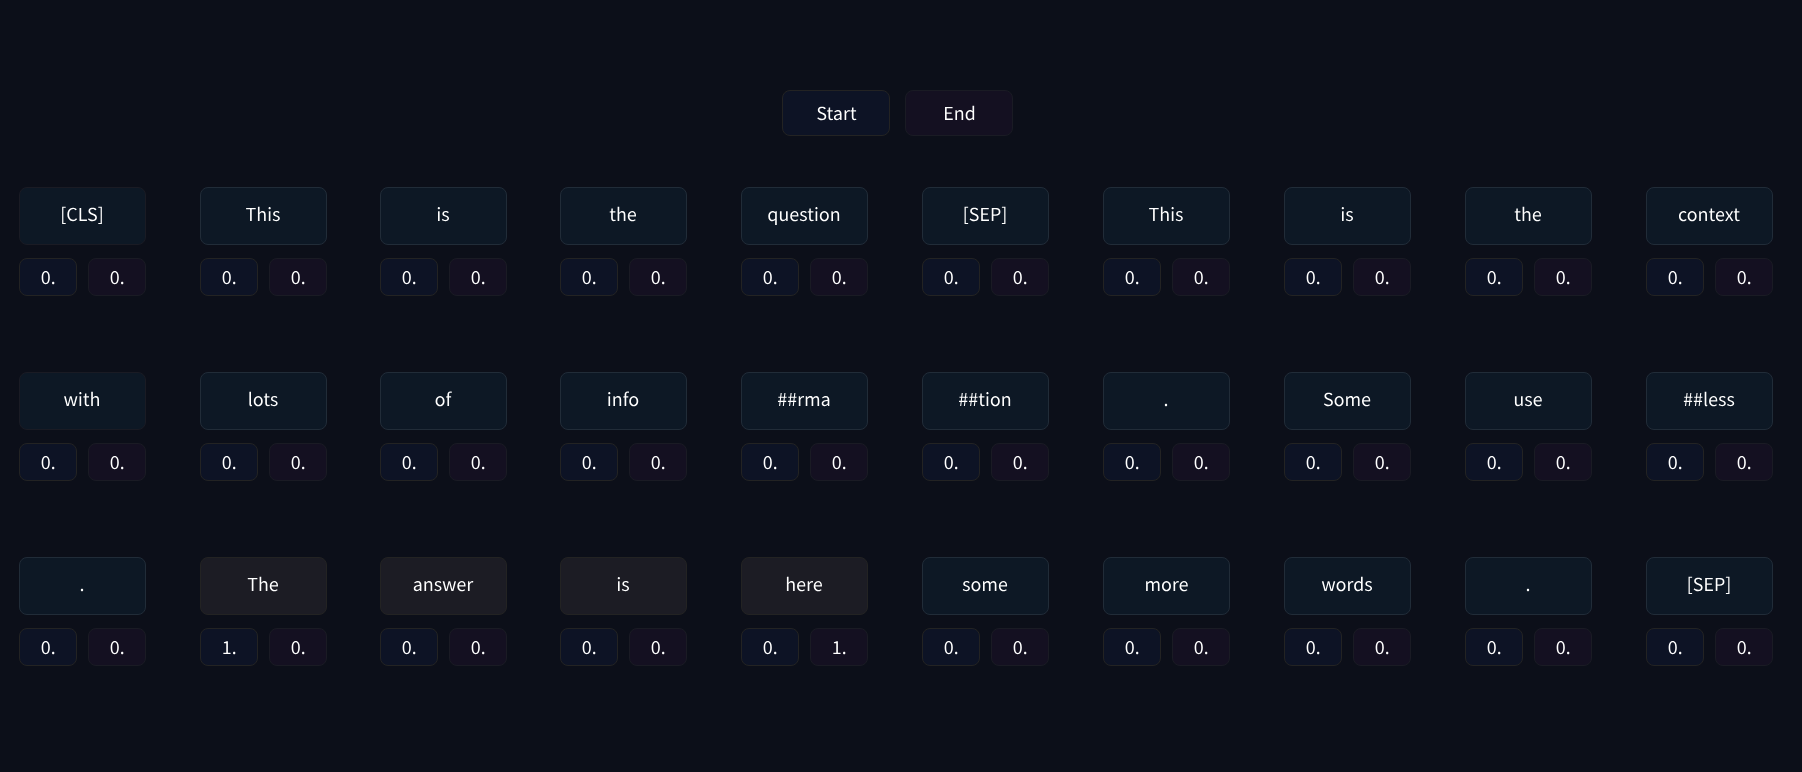

In [13]:
context = raw_datasets["train"][0]["context"]
question = raw_datasets["train"][0]["question"]

inputs = tokenizer(question, context)
pprint(tokenizer.decode(inputs["input_ids"]))

### documentation
- max_length to set the maximum length (here 100)
- truncation="only_second" to truncate the context (which is in the second position) when the question with its context is too long
- stride to set the number of overlapping tokens between two successive chunks (here 50)
- return_overflowing_tokens=True to let the tokenizer know we want the overflowing tokens
---
### GPT

 `max_length`: This parameter sets the maximum length of the tokenized sequence. If the combined length of the question and context exceeds this value after tokenization, the text will be truncated or split to fit within this length.

 `truncation`: This parameter controls how truncation is applied when the total length of the tokenized sequence (question + context) exceeds the `max_length`. In this case, `"only_second"` means that only the context will be truncated if needed, keeping the entire question intact.

 `stride`: The stride determines how much the sliding window moves when tokenizing long sequences. In your example, the context will be divided into overlapping segments with a length of `max_length`, and the stride of 50 indicates that the sliding window will move 50 tokens at a time.

 `return_overflowing_tokens`: This parameter controls whether to return any tokens that are left over after applying truncation. If `True`, the tokenizer will return both the truncated tokens that fit within the `max_length` and any additional tokens that were truncated.



In [ ]:
inputs = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
)

for ids in inputs["input_ids"]:
    pprint(tokenizer.decode(ids))

('[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes '
 'France? [SEP] Architecturally, the school has a Catholic character. Atop the '
 "Main Building's gold dome is a golden statue of the Virgin Mary. Immediately "
 'in front of the Main Building and facing it, is a copper statue of Christ '
 'with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main '
 'Building is the Basilica of the Sacred Heart. Immediately behind the basi '
 '[SEP]')
('[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes '
 'France? [SEP] the Main Building and facing it, is a copper statue of Christ '
 'with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main '
 'Building is the Basilica of the Sacred Heart. Immediately behind the '
 'basilica is the Grotto, a Marian place of prayer and reflection. It is a '
 'replica of the grotto at Lourdes, France where the Virgin [SEP]')
('[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lo


- **`offset_mapping`**:
   The `offset_mapping` is a feature provided by Hugging Face's Transformers library, which the `tokenizer` is a part of. When you tokenize a text, it is split into subwords or tokens. The `offset_mapping` provides a mapping between the characters in the original text and the corresponding tokens in the tokenized sequence.

   For example, if you have the sentence "I enjoy reading books," and it gets tokenized into ["I", "enjoy", "reading", "books"], the `offset_mapping` would tell you which characters in the original sentence correspond to each token. This is particularly useful when you want to map back the tokenized output to the original text, especially for tasks like extracting spans of text for question-answering or highlighting in a UI.

- **`overflow_to_sample_mapping`**:
   The `return_overflowing_tokens=True` parameter in your `tokenizer` call indicates that you want to handle cases where the input text exceeds the maximum length that the model can handle. When you set `return_overflowing_tokens` to `True`, the `tokenizer` will return tokens that are beyond the specified `max_length` as separate sequences.

   The `overflow_to_sample_mapping` is an index mapping that tells you which original input examples (samples) each of the returned token sequences corresponds to. In the case of texts that exceed the maximum length, they are split into multiple sequences, and this mapping helps you associate each token sequence with the original example it came from.



In [ ]:
inputs = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)
pprint(inputs.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'offset_mapping', 'overflow_to_sample_mapping'])


In [ ]:
inputs["overflow_to_sample_mapping"]

[0, 0, 0, 0]

In [ ]:
inputs = tokenizer(
    raw_datasets["train"][2:6]["question"],
    raw_datasets["train"][2:6]["context"],
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)


In [ ]:
pprint(f"The 4 examples gave {len(inputs['input_ids'])} features.")
pprint(f"Here is where each comes from: {inputs['overflow_to_sample_mapping']}.")

'The 4 examples gave 19 features.'
('Here is where each comes from: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, '
 '3, 3, 3, 3].')


In [ ]:
answers = raw_datasets["train"][2:6]["answers"]
start_positions = []
end_positions = []

for i, offset in enumerate(inputs["offset_mapping"]):
    sample_idx = inputs["overflow_to_sample_mapping"][i]
    answer = answers[sample_idx]
    start_char = answer["answer_start"][0]
    end_char = answer["answer_start"][0] + len(answer["text"][0])
    sequence_ids = inputs.sequence_ids(i)

    # Find the start and end of the context
    idx = 0
    while sequence_ids[idx] != 1:
        idx += 1
    context_start = idx
    while sequence_ids[idx] == 1:
        idx += 1
    context_end = idx - 1

    # If the answer is not fully inside the context, label is (0, 0)
    if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
        start_positions.append(0)
        end_positions.append(0)
    else:
        # Otherwise it's the start and end token positions
        idx = context_start
        while idx <= context_end and offset[idx][0] <= start_char:
            idx += 1
        start_positions.append(idx - 1)

        idx = context_end
        while idx >= context_start and offset[idx][1] >= end_char:
            idx -= 1
        end_positions.append(idx + 1)

start_positions, end_positions

([83, 51, 19, 0, 0, 64, 27, 0, 34, 0, 0, 0, 67, 34, 0, 0, 0, 0, 0],
 [85, 53, 21, 0, 0, 70, 33, 0, 40, 0, 0, 0, 68, 35, 0, 0, 0, 0, 0])

In [ ]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'offset_mapping', 'overflow_to_sample_mapping'])

In [ ]:
idx = 0
sample_idx = inputs["overflow_to_sample_mapping"][idx]
answer = answers[sample_idx]["text"][0]

start = start_positions[idx]
end = end_positions[idx]
labeled_answer = tokenizer.decode(inputs["input_ids"][idx][start : end + 1])

print(f"Theoretical answer: {answer}, labels give: {labeled_answer}")

NameError: name 'inputs' is not defined

In [ ]:
idx = 4
sample_idx = inputs["overflow_to_sample_mapping"][idx]
answer = answers[sample_idx]["text"][0]

decoded_example = tokenizer.decode(inputs["input_ids"][idx])
pprint(f"Theoretical answer: {answer}, \n decoded example: {decoded_example}")

('Theoretical answer: a Marian place of prayer and reflection, \n'
 ' decoded example: [CLS] What is the Grotto at Notre Dame? [SEP] '
 'Architecturally, the school has a Catholic character. Atop the Main '
 "Building's gold dome is a golden statue of the Virgin Mary. Immediately in "
 'front of the Main Building and facing it, is a copper statue of Christ with '
 'arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main '
 'Building is the Basilica of the Sacred Heart. Immediately behind the '
 'basilica is the Grot [SEP]')


In [ ]:
max_length = 384
stride = 128


def preprocess_training_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        sample_idx = sample_map[i]
        answer = answers[sample_idx]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [ ]:
train_dataset = raw_datasets["train"].map(
    preprocess_training_examples,
    batched=True,
    remove_columns=raw_datasets["train"].column_names,
)
len(raw_datasets["train"]), len(train_dataset)

Loading cached processed dataset at C:\Users\Gyanprakash\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453\cache-9b4f71eea0ecaf8f.arrow


(87599, 88729)